# Import data

In [1]:
%matplotlib inline

In [2]:
#import libraries
import glob #using glob to read multiple files
import datetime #manipulate DateTime 
import pandas as pd # structure the datasets
import numpy as np #manipulate the dataset
import seaborn as sns #visualize the data 
from matplotlib import pyplot as plt  #visualize the data 
%matplotlib inline 

sns.set(style="whitegrid")

In [3]:
# making data frame from the csv file 
df = pd.read_csv('/Users/goundosidibe/Downloads/DataVis/Group4_Lockdown_Spending_and_Savings.csv', 
                 skiprows=[1],usecols = [1,2,3,4,5,6,7,8,9,10,11,12])

# printing the first 5 rows of  the data
df.head(5)

,Age,Gender,How much did you spend between 23rd March to 23rd April on Online Shopping?,How much did you save between 23rd March to 23rd April from not Shopping Online? (not purchasing items online),How much did you spend between 23rd March to 23rd April on Hospitality?,How much did you save between 23rd March to 23rd April on no Hospitality? (not hosting guests or parties),How much did you spend between 23rd March to 23rd April on Transport?,How much did you save between 23rd March to 23rd April by not using Transport? (not using forms of transport or public transport eg: trains or cars),How much did you spend between 23rd March to 23rd April on Leisure Activities?,How much did you save between 23rd March to 23rd April by not doing Leisure Activities? (not taking part in leisure activities eg: sports and clubs),What were other areas you spent money on- between 23rd March to 23rd April 2020?,How much did you spend on these areas- between 23rd March to 23rd April 2020?
0,18 - 24,Male,£20.01 - £40,£20.01 - £40,£0 - £20,£0 - £20,£20.01 - £40,£80.01+,£0 - £20,£0 - £20,Non,£0 - £20
1,18 - 24,Male,£80.01+,£0 - £20,£20.01 - £40,£0 - £20,£0 - £20,£40.01 - £60,£0 - £20,£40.01 - £60,online shopping,£80.01+
2,35 - 44,Male,£80.01+,£0 - £20,£20.01 - £40,£20.01 - £40,£0 - £20,£80.01+,£80.01+,£0 - £20,"rent, monthly subscriptions , prescription med...",£80.01+
3,18 - 24,Female,£80.01+,£0 - £20,£0 - £20,£40.01 - £60,£0 - £20,£20.01 - £40,£0 - £20,£40.01 - £60,Rent,£80.01+
4,18 - 24,Male,£20.01 - £40,£0 - £20,£0 - £20,£0 - £20,£20.01 - £40,£0 - £20,£0 - £20,£0 - £20,Clothes,£80.01+


In [4]:
#number of rows and columns
df.shape

(55, 12)

# Clean data

In [83]:
#changing column names
df.columns = ['age', 'gender','shoppingexpenses','shoppingSavings','hospitalityExpenses',
              'hospitalitySavings','transportExpenses','transportSavings','leisureExpenses',
              'leisureSavings','otherExpenses','amountExpenses']

In [10]:
# inspect data dtype
df.dtypes

age                    object
gender                 object
shoppingexpenses       object
shoppingSavings        object
hospitalityExpenses    object
hospitalitySavings     object
transportExpenses      object
transportSavings       object
leisureExpenses        object
leisureSavings         object
otherExpenses          object
amountExpenses         object
dtype: object

In [11]:
#convert columns to nominal data type. 
df['age'] = df['age'].astype('category') 
df['gender'] = df['gender'].astype('category') 
df['shoppingexpenses'] = df['shoppingexpenses'].astype('category')
df['shoppingSavings'] = df['shoppingSavings'].astype('category')
df['hospitalityExpenses'] = df['hospitalityExpenses'].astype('category')
df['hospitalitySavings'] = df['hospitalitySavings'].astype('category')
df['transportExpenses'] = df['transportExpenses'].astype('category')
df['transportSavings'] = df['transportSavings'].astype('category')
df['leisureExpenses'] = df['leisureExpenses'].astype('category')
df['leisureSavings'] = df['leisureSavings'].astype('category')
df['leisureSavings'] = df['leisureSavings'].astype('category')
df['otherExpenses'] = df['otherExpenses'].astype('str')
df['amountExpenses'] = df['amountExpenses'].astype('category')

In [12]:
# inspect data dtype
df.dtypes


age                    category
gender                 category
shoppingexpenses       category
shoppingSavings        category
hospitalityExpenses    category
hospitalitySavings     category
transportExpenses      category
transportSavings       category
leisureExpenses        category
leisureSavings         category
otherExpenses            object
amountExpenses         category
dtype: object

In [6]:
#missing/null Values
df.isnull().sum()

age                    0
gender                 0
shoppingexpenses       0
shoppingSavings        0
hospitalityExpenses    0
hospitalitySavings     0
transportExpenses      0
transportSavings       0
leisureExpenses        0
leisureSavings         0
otherExpenses          1
amountExpenses         0
dtype: int64

In [81]:
# dropping all those rows which  have any missing value in it. 
df.dropna(inplace = True) 

#findding whether the dataset contain duplicate rows
df.duplicated().sum()

6

In [131]:
df = df.drop_duplicates()

df.head(5)

,age,gender,shoppingexpenses,shoppingSavings,hospitalityExpenses,hospitalitySavings,transportExpenses,transportSavings,leisureExpenses,leisureSavings,otherExpenses,amountExpenses
0,18 - 24,Male,£20.01 - £40,£20.01 - £40,£0 - £20,£0 - £20,£20.01 - £40,£80.01+,£0 - £20,£0 - £20,Non,£0 - £20
1,18 - 24,Male,£80.01+,£0 - £20,£20.01 - £40,£0 - £20,£0 - £20,£40.01 - £60,£0 - £20,£40.01 - £60,online shopping,£80.01+
2,35 - 44,Male,£80.01+,£0 - £20,£20.01 - £40,£20.01 - £40,£0 - £20,£80.01+,£80.01+,£0 - £20,"rent, monthly subscriptions , prescription med...",£80.01+
3,18 - 24,Female,£80.01+,£0 - £20,£0 - £20,£40.01 - £60,£0 - £20,£20.01 - £40,£0 - £20,£40.01 - £60,Rent,£80.01+
4,18 - 24,Male,£20.01 - £40,£0 - £20,£0 - £20,£0 - £20,£20.01 - £40,£0 - £20,£0 - £20,£0 - £20,Clothes,£80.01+


# Visualise data

# Participants gender 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

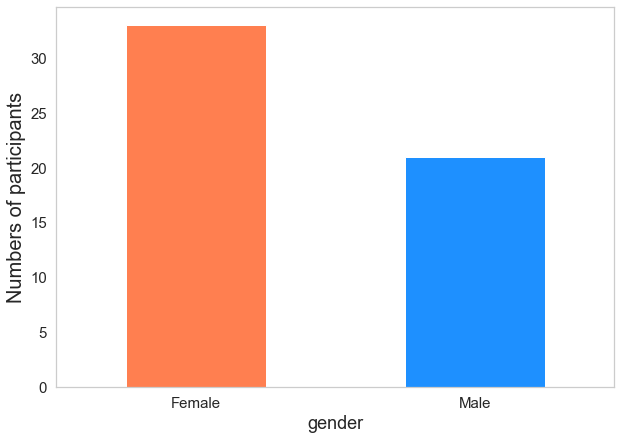

In [104]:
ax = df['gender'].value_counts().plot(kind='bar', figsize=(10,7),color=['coral','dodgerblue'], fontsize=15);

ax.set_alpha(0.8)
ax.set_title("", fontsize=20)
ax.set_ylabel("Numbers of participants", fontsize=20);
ax.set_xlabel("gender", fontsize=18);
ax.grid(b = True, color ='grey', linestyle ='', linewidth = 0.5, alpha = 0.2)

plt.xticks(rotation=0,horizontalalignment="center")


# Participants age

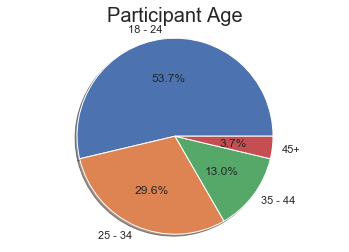

In [86]:
labels = df['age'].astype('category').cat.categories.tolist()
counts = df['age'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) 
ax1.axis('equal')
plt.title("Participant Age", fontsize=20)
plt.show()



# Lockdown : Participants online expenses and savings 

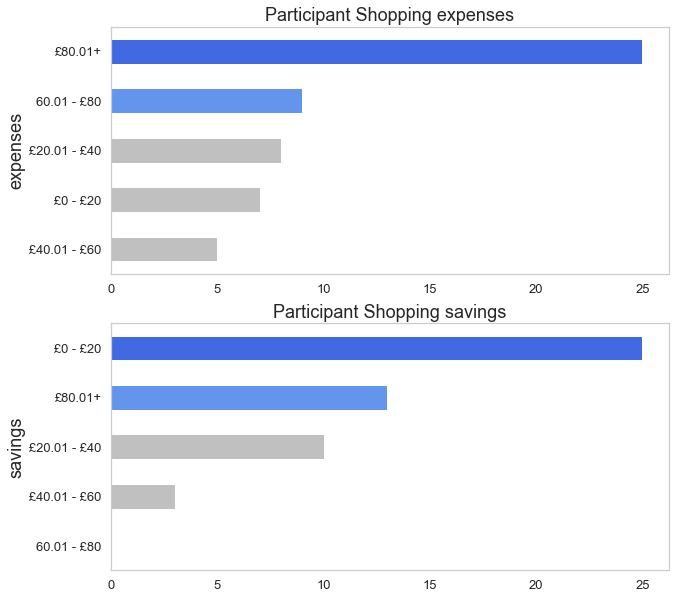

In [126]:
ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']
df['shoppingexpenses'] = df['shoppingexpenses'].astype( pd.CategoricalDtype(ordered=True,categories=ordered))
df['shoppingSavings'] = df['shoppingSavings'].astype( pd.CategoricalDtype(ordered=True,categories=ordered))

fig, ax = plt.subplots(2)

df_sorted= df.sort_values('shoppingexpenses')

df.groupby(['shoppingexpenses']).size().nlargest(5).plot(kind='barh', color=['royalblue','cornflowerblue','silver','silver','silver'], fontsize=13,figsize=(10,10), ax=ax[0]) ;
df.groupby(['shoppingSavings']).size().nlargest(5).plot(kind='barh', color=['royalblue','cornflowerblue','silver','silver','silver'], fontsize=13,  ax=ax[1]) ;
                                                                                                                              

# ax.set_alpha(0.8)
ax[0].set_title("Participant Shopping expenses",fontsize=18)
ax[0].set_ylabel("expenses", fontsize=18)

ax[1].set_title("Participant Shopping savings",fontsize=18)
ax[1].set_ylabel("savings", fontsize=18)

# # # Adding x, y gridlines 
ax[0].grid(b = True, color ='grey', linestyle ='', linewidth = 0.5, alpha = 0.2)
ax[1].grid(b = True, color ='grey', linestyle ='', linewidth = 0.5, alpha = 0.2)



# Show top values 
ax[0].invert_yaxis() 
ax[1].invert_yaxis()

# # Lockdown : Participants hospitality expenses and savings 

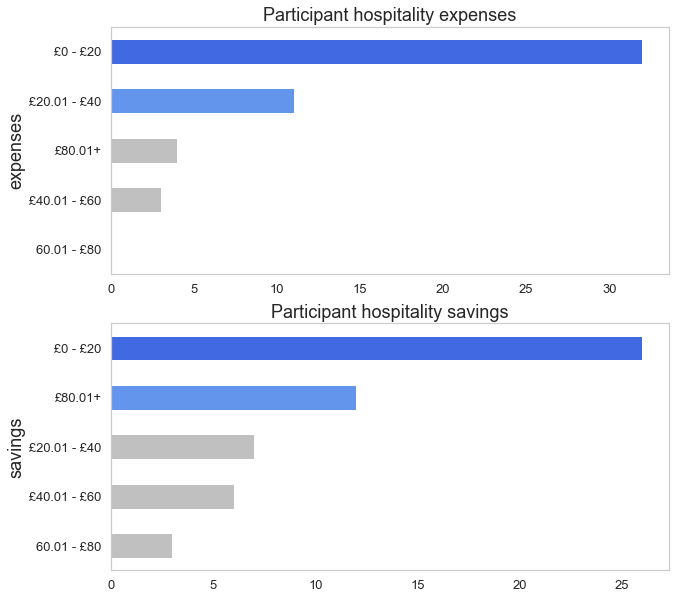

In [127]:
ordered = ['£0 - £20','£20.01 - £40','£40.01 - £60','60.01 - £80','£80.01+']
df['hospitalityExpenses'] = df['hospitalityExpenses'].astype( pd.CategoricalDtype(ordered=True,categories=ordered))
df['hospitalitySavings'] = df['hospitalitySavings'].astype( pd.CategoricalDtype(ordered=True,categories=ordered))

fig, ax = plt.subplots(2)

df.groupby(['hospitalityExpenses']).size().nlargest(5).plot(kind='barh', color=['royalblue','cornflowerblue','silver','silver','silver'], fontsize=13,figsize=(10,10), ax=ax[0]) ;
df.groupby(['hospitalitySavings']).size().nlargest(5).plot(kind='barh', color=['royalblue','cornflowerblue','silver','silver','silver'], fontsize=13,  ax=ax[1]) ;
                                                                                                                              

ax[0].set_title("Participant hospitality expenses",fontsize=18)
ax[0].set_ylabel("expenses", fontsize=18)

ax[1].set_title("Participant hospitality savings",fontsize=18)
ax[1].set_ylabel("savings", fontsize=18)


# # # Adding x, y gridlines 
ax[0].grid(b = True, color ='grey', linestyle ='', linewidth = 0.5, alpha = 0.2)
ax[1].grid(b = True, color ='grey', linestyle ='', linewidth = 0.5, alpha = 0.2)

 #padding between axes and labels 

# Show top values 
ax[0].invert_yaxis() 
ax[1].invert_yaxis()

# Lockdown : Participants transport expenses and savings 

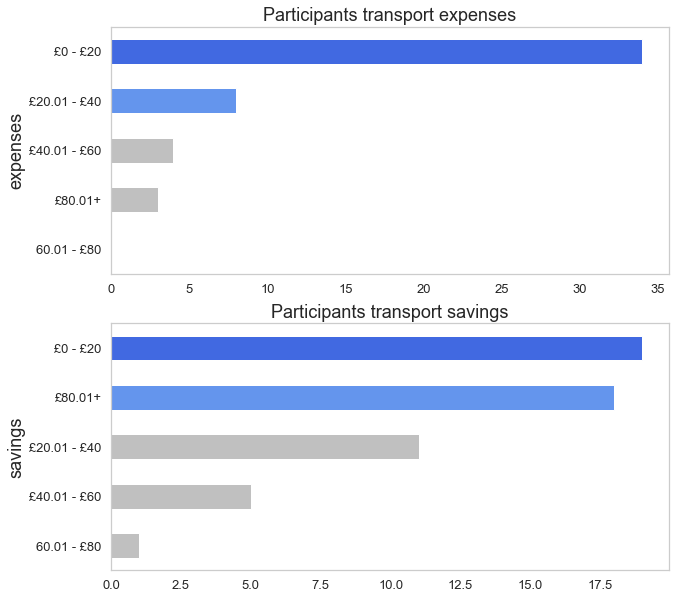

In [128]:
df['transportExpenses'] = df['transportExpenses'].astype( pd.CategoricalDtype(ordered=True,categories=ordered))
df['transportSavings'] = df['transportSavings'].astype( pd.CategoricalDtype(ordered=True,categories=ordered))

fig, ax = plt.subplots(2)

df.groupby(['transportExpenses']).size().nlargest(5).plot(kind='barh', color=['royalblue','cornflowerblue','silver','silver','silver'], fontsize=13,figsize=(10,10), ax=ax[0]) ;
df.groupby(['transportSavings']).size().nlargest(5).plot(kind='barh', color=['royalblue','cornflowerblue','silver','silver','silver'], fontsize=13,  ax=ax[1]) ;
                                                                                                                              

ax[0].set_title("Participants transport expenses",fontsize=18)
ax[0].set_ylabel("expenses", fontsize=18)

ax[1].set_title("Participants transport savings",fontsize=18)
ax[1].set_ylabel("savings", fontsize=18)

# # # Adding x, y gridlines 
ax[0].grid(b = True, color ='grey', linestyle ='', linewidth = 0.5, alpha = 0.2)
ax[1].grid(b = True, color ='grey', linestyle ='', linewidth = 0.5, alpha = 0.2)


# Show top values 
ax[0].invert_yaxis() 
ax[1].invert_yaxis()

# Lockdown : Participants leisure expenses and savings 

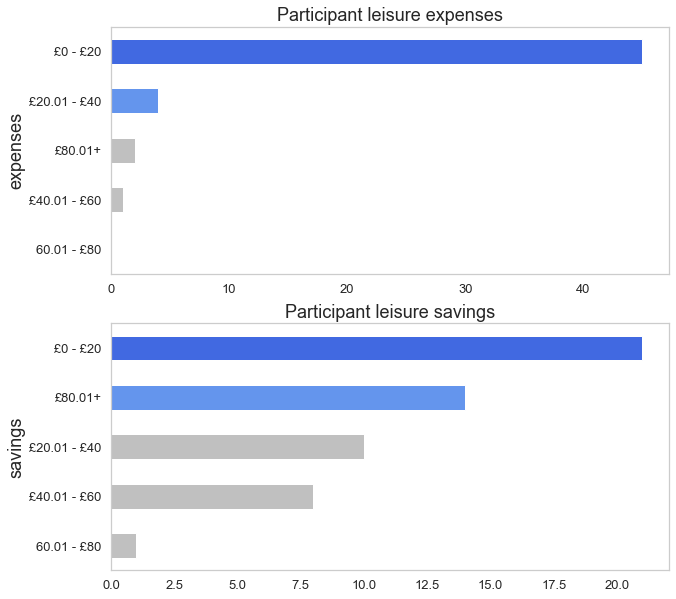

In [129]:
df['leisureExpenses'] = df['leisureExpenses'].astype( pd.CategoricalDtype(ordered=True,categories=ordered))
df['leisureSavings'] = df['leisureSavings'].astype( pd.CategoricalDtype(ordered=True,categories=ordered))

fig, ax = plt.subplots(2)

df.groupby(['leisureExpenses']).size().nlargest(5).plot(kind='barh', color=['royalblue','cornflowerblue','silver','silver','silver'], fontsize=13,figsize=(10,10), ax=ax[0]) ;
df.groupby(['leisureSavings']).size().nlargest(5).plot(kind='barh', color=['royalblue','cornflowerblue','silver','silver','silver'], fontsize=13,  ax=ax[1]) ;
                                                                                                                              

ax[0].set_title("Participant leisure expenses",fontsize=18)
ax[0].set_ylabel("expenses", fontsize=18)

ax[1].set_title("Participant leisure savings",fontsize=18)
ax[1].set_ylabel("savings", fontsize=18)

# # # Adding x, y gridlines 
ax[0].grid(b = True, color ='grey', linestyle ='', linewidth = 0.5, alpha = 0.2)
ax[1].grid(b = True, color ='grey', linestyle ='', linewidth = 0.5, alpha = 0.2)


# Show top values 
ax[0].invert_yaxis() 
ax[1].invert_yaxis()

# Lockdown : Participants other expenses 

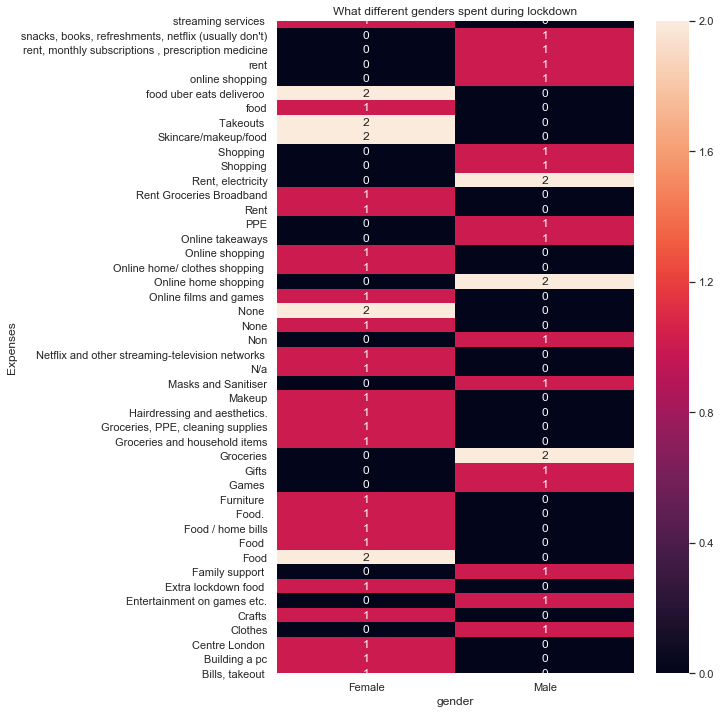

In [84]:
# Generate normalised cross tabulation.
table = pd.crosstab(df['otherExpenses'], df['gender'])
# Remove nonbinary from this visualisation. 
# Sort by female responses.
table = table.sort_values(by='otherExpenses', ascending=False) #age was Female
plt.figure(figsize=(8,12))
ax = sns.heatmap(table, annot=True) 
ax.set_title('What different genders spent during lockdown') 
ax.set_xlabel('gender')
ax.set_ylabel('Expenses')
plt.show()